In [1]:
cd Dataweav_Assignment

/home/sanyam/Documents/Dataweav_Assignment


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
import os
os.mkdir('Problem3_bgrm')

In [3]:
from PIL import Image, ImageDraw

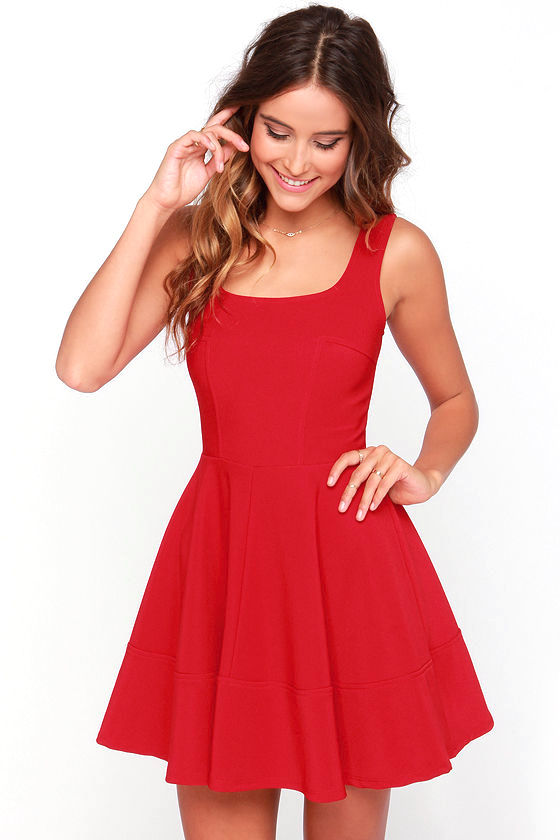

In [21]:
Image.open('Problem3/image3.jpg')

## Blackening the Background

In [23]:
def remove_bg(loc,out):
    import cv2
    import numpy as np

    #== Parameters =======================================================================
    BLUR = 21
    CANNY_THRESH_1 = 10
    CANNY_THRESH_2 = 200
    MASK_DILATE_ITER = 10
    MASK_ERODE_ITER = 10
    MASK_COLOR = (0.0,0.0,0.0) # In BGR format

    img = cv2.imread(loc)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    #-- Edge detection -----------------------------------------------------------------
    edges = cv2.Canny(gray, CANNY_THRESH_1, CANNY_THRESH_2)
    edges = cv2.dilate(edges, None)
    edges = cv2.erode(edges, None)

    contour_info = []
    _,contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    for c in contours:
        contour_info.append((
            c,
            cv2.isContourConvex(c),
            cv2.contourArea(c),
        ))
    contour_info = sorted(contour_info, key=lambda c: c[2], reverse=True)
    max_contour = contour_info[0]

    #-- Create empty mask, draw filled polygon on it corresponding to largest contour ----
    # Mask is black, polygon is white
    mask = np.zeros(edges.shape)
    cv2.fillConvexPoly(mask, max_contour[0], (255))

    #-- Smooth mask, then blur it --------------------------------------------------------
    mask = cv2.dilate(mask, None, iterations=MASK_DILATE_ITER)
    mask = cv2.erode(mask, None, iterations=MASK_ERODE_ITER)
    mask = cv2.GaussianBlur(mask, (BLUR, BLUR), 0)
    mask_stack = np.dstack([mask]*3)    # Create 3-channel alpha mask

    #-- Blend masked img into MASK_COLOR background --------------------------------------
    mask_stack  = mask_stack.astype('float32') / 255.0          # Use float matrices, 
    img         = img.astype('float32') / 255.0  

    masked = (mask_stack * img) + ((1-mask_stack) * MASK_COLOR) # Blend
    masked = (masked * 255).astype('uint8') 

    cv2.imwrite(out,masked)

In [7]:
remove_bg('Problem3/image1.jpg','Problem3_bgrm/image1')

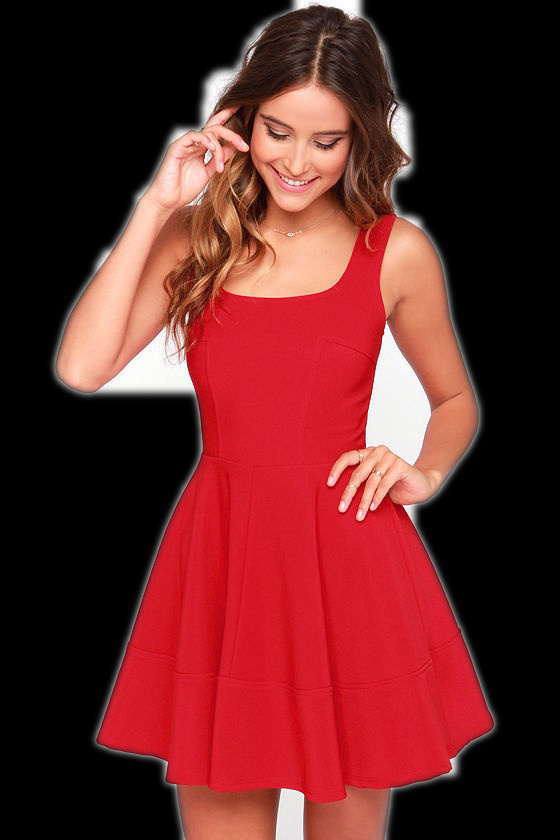

In [25]:
Image.open('Problem3_bgrm/image3.jpg')

In [24]:
for files in os.listdir('Problem3'):
    remove_bg('Problem3'+"/"+files,'Problem3_bgrm'+"/"+files)

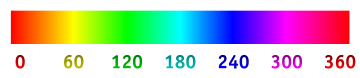

In [20]:
Image.open('HSV_Scale.png')

In [13]:
boundaries=[
    ([100,50,50],[130,255,255]),
    ([30,50,50],[75,255,255]),
    ([170,50,50],[180,255,255])
]

,Blue,Green,Images,Red
0,25.779729,0.006489,image4.jpg.jpg,0.209802
1,0.000000,33.515200,image2.jpg.jpg,6.857700
2,0.809660,0.208491,image1.jpg.jpg,41.237641
3,45.547813,0.002821,image5.jpg.jpg,0.088395
4,0.004261,0.004261,image3.jpg.jpg,49.760612


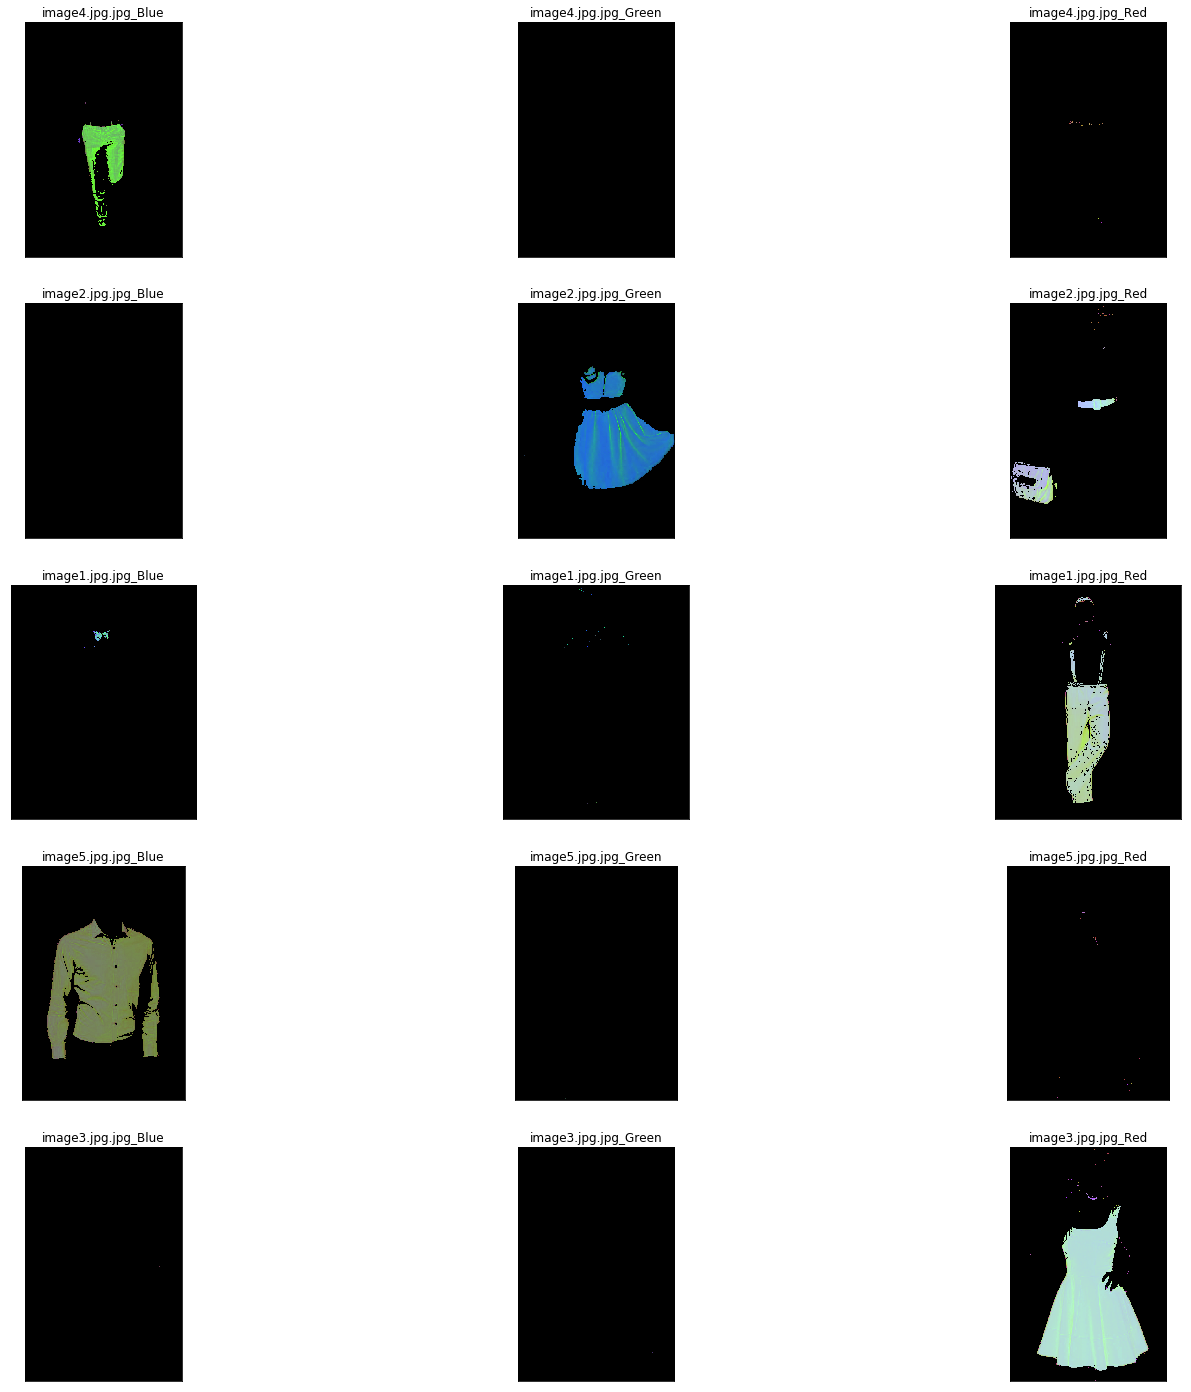

In [18]:
# loop over the boundaries
outputs=[]
plt.figure(figsize=(25,25))
i=1
colors=['Blue','Green','Red']
Blue=[]
Green=[]
Red=[]
files=os.listdir('Problem3_bgrm')
for fl in os.listdir('Problem3_bgrm'):
    j=0
    
    for (lower, upper) in boundaries:
        img=cv2.imread('Problem3_bgrm'+"/"+fl)
        img_hsv=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        value=np.where(img_hsv[:,:,2]>0,1,0)## beacuse the value of Black colour is zero
        
        total=np.sum(value)
        
    # create NumPy arrays from the boundaries
        lower = np.array(lower, dtype = "uint8")
        upper = np.array(upper, dtype = "uint8")
 
  img=cv2.imread('Problem3_bgrm'+"/"+fl)
        img_hsv=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)  # find the colors within the specified boundaries and apply
    # the mask
        mask = cv2.inRange(img_hsv, lower, upper)
        
        plt.subplot(len(files),3,i)
        output = cv2.bitwise_and(img_hsv, img_hsv, mask = mask)
        plt.imshow(output)
        plt.title(fl+'_'+colors[j])
        plt.xticks([]),plt.yticks([])
        val_masked=np.where(output[:,:,2]>0,1,0)
        total_mask=np.sum(val_masked)
        percent=total_mask/total*100
        if colors[j]=="Blue":
            Blue.append(percent)
        if colors[j]=="Green":
            Green.append(percent)
        if colors[j]=="Red":
            Red.append(percent)

        i+=1
        j+=1
database=pd.DataFrame({'Images':files,'Blue':Blue,'Green':Green,'Red':Red})
database

In [19]:
database.to_csv('Problem3.csv')